In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [240]:
file1 = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
file1

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [241]:
#.info() to check what kind of data we have in the Dataframe
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [242]:
# .select_dtypes based on np.number/np.objer to get the numerical and object data
# we create variables(file1_num/file1_obj) to store the comented data from the columns
file1_num =file1.select_dtypes(include = np.number)
file1_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [243]:
file1_obj =file1.select_dtypes(include = object)
file1_obj

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


# Now we will try to check the normality of the numerical variables visually
## Use seaborn library to construct distribution plots for the numerical variables
## Use Matplotlib to construct histograms
## Do the distributions for different numerical variables look like a normal distribution

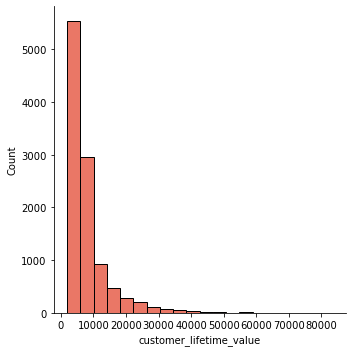

In [244]:
# We use here sns.displot to check the normality of the numerical values
sns.displot((file1_num['customer_lifetime_value']), bins=20)

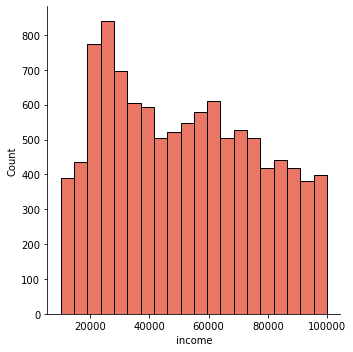

In [245]:
sns.displot((file1_num['income']), bins=20)

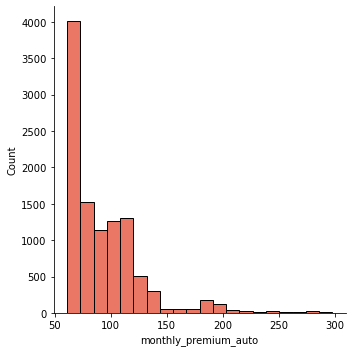

In [246]:
sns.displot((file1_num['monthly_premium_auto']), bins=20)



array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

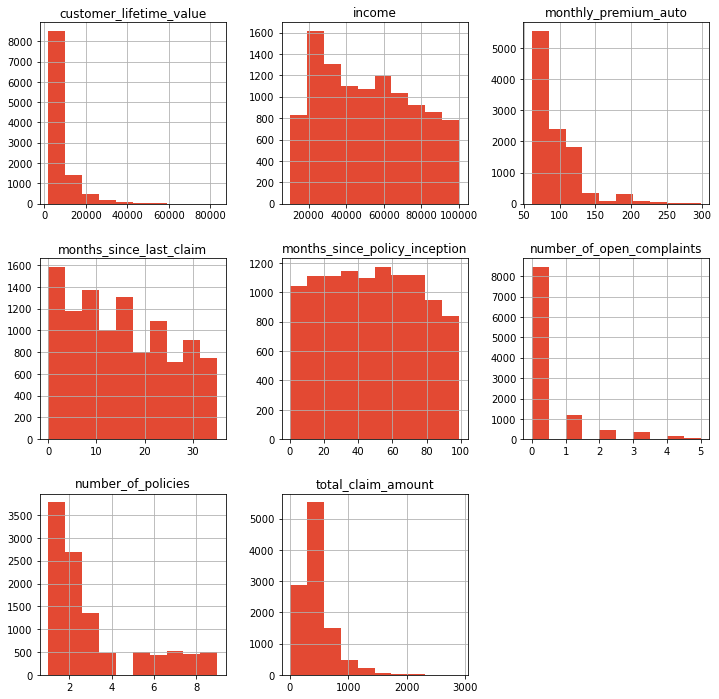

In [247]:
#we can also use the following function to check the normality at a glance with histagrams
file1_num.hist(figsize=(12,12))

# Do the distributions for different numerical variables look like a normal distribution
### No

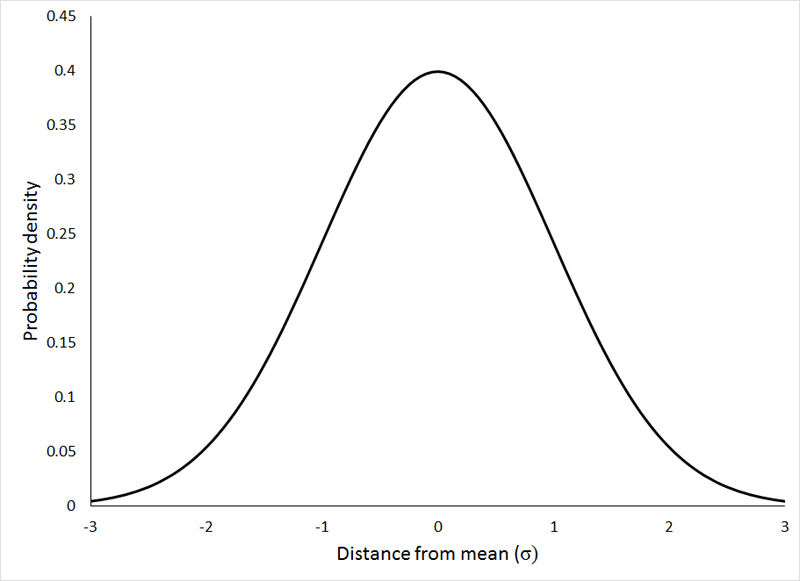

In [248]:
# we imported an image of a normal distribution, as we can see, the distribution of numerical variables doesn't look like a normal distribution
from IPython.display import Image
Image ('Data/stanorm.jpeg')

# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

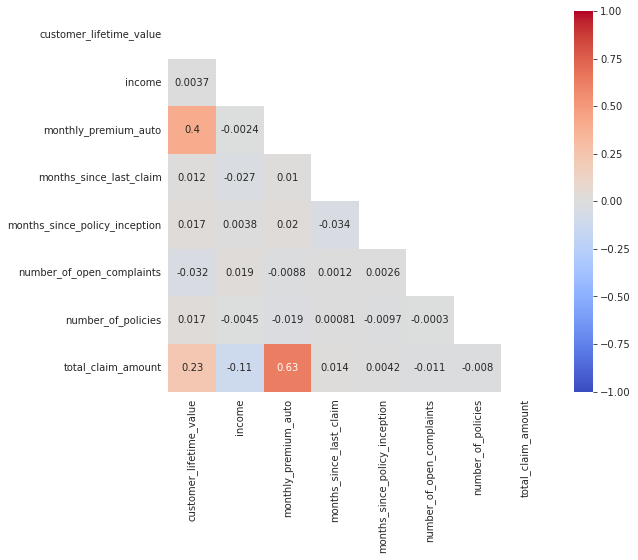

In [249]:
#We use the following function to check the multicollinearity

corr = file1_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [250]:
# From my point of view, the only point where there is kind of correlation (0.63) is in the intersection between monthly premium auto and total claim amount.

# Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [251]:
# There is no high correaltion between a pair of features, as we related in last point.

# Show a plot of the total number of responses.


In [252]:
#We define a variable that includes the column response. So we can check what kind of varibles we have (no/yes) and how many of them.
responses = file1['response'].value_counts()
responses


no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'Number of responses')

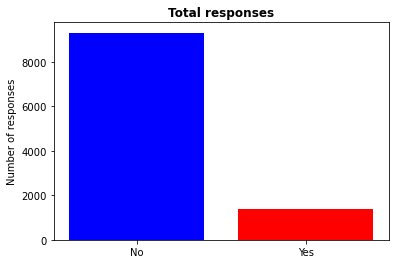

In [253]:
# Based in the information we have in responses, let's create a bar chart of the total number of responses using the following function
plt.bar(responses.index, responses, color=('blue','red'))

plt.title('Total responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("Number of responses")

# Show a plot of the response by the sales channel.

In [254]:
response_channel = file1.groupby(['sales_channel','response'])['coverage'].count().reset_index()
response_channel

,sales_channel,response,coverage
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


In [255]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Response by sales channel'}, xlabel='sales_channel', ylabel='coverage'>

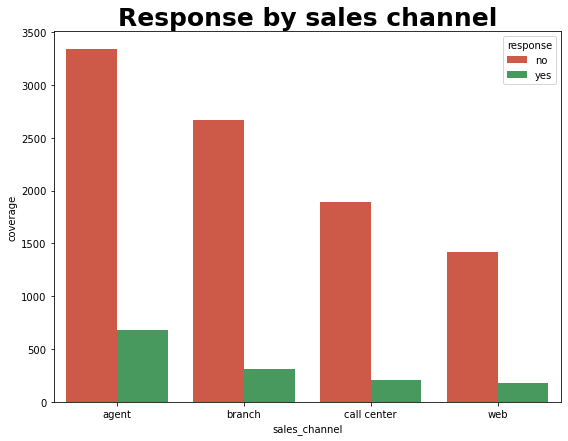

In [256]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by sales channel', size='25', fontweight='bold')

sns.barplot(x = response_channel['sales_channel'],y = response_channel['coverage'], hue = response_channel['response'], palette=palette_alive)

# Show a plot of the response by the total claim amount.

In [257]:
total_claim = file1['total_claim_amount'].value_counts()
total_claim

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [258]:
response_claim = file1.groupby(['response','total_claim_amount'])['income'].count().reset_index()
response_claim

,response,total_claim_amount,income
0,no,0,9
1,no,1,9
2,no,2,12
3,no,3,9
4,no,4,12
...,...,...,...
1358,yes,1324,7
1359,yes,1358,6
1360,yes,1416,1
1361,yes,1443,1


<AxesSubplot:title={'center':'Response by total claim amount'}, xlabel='total_claim_amount', ylabel='income'>

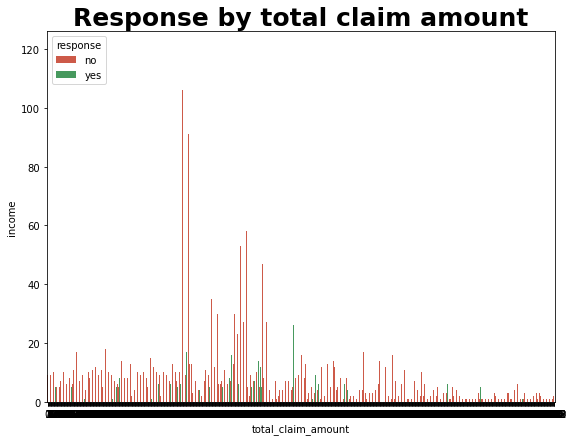

In [272]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by total claim amount', size='25', fontweight='bold')
sns.barplot(x = response_claim['total_claim_amount'],y = response_claim['income'], hue = response_claim['response'], palette=palette_alive)

In [263]:
df_3 = pd.concat([response_claim, total_claim_q])
df_3

,response,total_claim_amount,income,0
0.0,no,0.0,9.0,NaN
1.0,no,1.0,9.0,NaN
2.0,no,2.0,12.0,NaN
3.0,no,3.0,9.0,NaN
4.0,no,4.0,12.0,NaN
...,...,...,...,...
0.6,NaN,NaN,NaN,453.0
0.7,NaN,NaN,NaN,513.0
0.8,NaN,NaN,NaN,599.0
0.9,NaN,NaN,NaN,777.0


In [268]:
df_3.rename(columns={ df_3.columns[3]: "total_claim_q" }, inplace = True)


df_3

,response,total_claim_amount,income,total_claim_q
0.0,no,0.0,9.0,NaN
1.0,no,1.0,9.0,NaN
2.0,no,2.0,12.0,NaN
3.0,no,3.0,9.0,NaN
4.0,no,4.0,12.0,NaN
...,...,...,...,...
0.6,NaN,NaN,NaN,58842.0
0.7,NaN,NaN,NaN,67573.8
0.8,NaN,NaN,NaN,76726.0
0.9,NaN,NaN,NaN,87904.4


In [269]:
df_3 = pd.concat([df_3, income_q])
df_3

,response,total_claim_amount,income,total_claim_q,0
0.0,no,0.0,9.0,NaN,NaN
1.0,no,1.0,9.0,NaN,NaN
2.0,no,2.0,12.0,NaN,NaN
3.0,no,3.0,9.0,NaN,NaN
4.0,no,4.0,12.0,NaN,NaN
...,...,...,...,...,...
0.6,NaN,NaN,NaN,NaN,58842.0
0.7,NaN,NaN,NaN,NaN,67573.8
0.8,NaN,NaN,NaN,NaN,76726.0
0.9,NaN,NaN,NaN,NaN,87904.4


In [270]:
df_3.rename(columns={ df_3.columns[4]: "income_q" }, inplace = True)

df_3

,response,total_claim_amount,income,total_claim_q,income_q
0.0,no,0.0,9.0,NaN,NaN
1.0,no,1.0,9.0,NaN,NaN
2.0,no,2.0,12.0,NaN,NaN
3.0,no,3.0,9.0,NaN,NaN
4.0,no,4.0,12.0,NaN,NaN
...,...,...,...,...,...
0.6,NaN,NaN,NaN,NaN,58842.0
0.7,NaN,NaN,NaN,NaN,67573.8
0.8,NaN,NaN,NaN,NaN,76726.0
0.9,NaN,NaN,NaN,NaN,87904.4


In [271]:
df_3.drop(['total_claim_amount', 'income'], axis = 1, inplace = True) 
df_3

,response,total_claim_q,income_q
0.0,no,NaN,NaN
1.0,no,NaN,NaN
2.0,no,NaN,NaN
3.0,no,NaN,NaN
4.0,no,NaN,NaN
...,...,...,...
0.6,NaN,NaN,58842.0
0.7,NaN,NaN,67573.8
0.8,NaN,NaN,76726.0
0.9,NaN,NaN,87904.4


In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by total claim amount', size='25', fontweight='bold')
sns.barplot(x = response_claim['total_claim_amount'],y = response_claim['coverage'], hue = response_claim['response'], palette=palette_alive)

In [ ]:
total_claim_q=file1['total_claim_amount'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
total_claim_q


In [ ]:
income_q=file1['income'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
file1.info()

In [ ]:
df_3.rename(columns={ df_3.columns[3]: "total_claim_q" }, inplace = True)


df_3


In [261]:

df_3.rename(columns={ df_3.columns[3]: "total_claim_q" }, inplace = True)


df_3

,response,total_claim_amount,income,total_claim_q
0.0,no,0.0,9.0,NaN
1.0,no,1.0,9.0,NaN
2.0,no,2.0,12.0,NaN
3.0,no,3.0,9.0,NaN
4.0,no,4.0,12.0,NaN
...,...,...,...,...
0.6,NaN,NaN,NaN,453.0
0.7,NaN,NaN,NaN,513.0
0.8,NaN,NaN,NaN,599.0
0.9,NaN,NaN,NaN,777.0


In [262]:
df_3 = pd.concat([response_claim, income_q])
df_3

,response,total_claim_amount,income,0
0.0,no,0.0,9.0,NaN
1.0,no,1.0,9.0,NaN
2.0,no,2.0,12.0,NaN
3.0,no,3.0,9.0,NaN
4.0,no,4.0,12.0,NaN
...,...,...,...,...
0.6,NaN,NaN,NaN,58842.0
0.7,NaN,NaN,NaN,67573.8
0.8,NaN,NaN,NaN,76726.0
0.9,NaN,NaN,NaN,87904.4


In [206]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1374 entries, 0.0 to 1.0
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   response            1363 non-null   object 
 1   total_claim_amount  1363 non-null   float64
 2   coverage            1363 non-null   float64
 3   0                   11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


# Show a plot of the response by income.

In [172]:
response_income = file1.groupby(['response','income'])['coverage'].count().reset_index()
response_income

,response,income,coverage
0,no,10037,1
1,no,10074,1
2,no,10088,1
3,no,10097,2
4,no,10105,1
...,...,...,...
8344,yes,98714,1
8345,yes,99196,1
8346,yes,99265,1
8347,yes,99742,1


In [170]:
file1_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


<AxesSubplot:title={'center':'Response by income'}, xlabel='response', ylabel='income'>

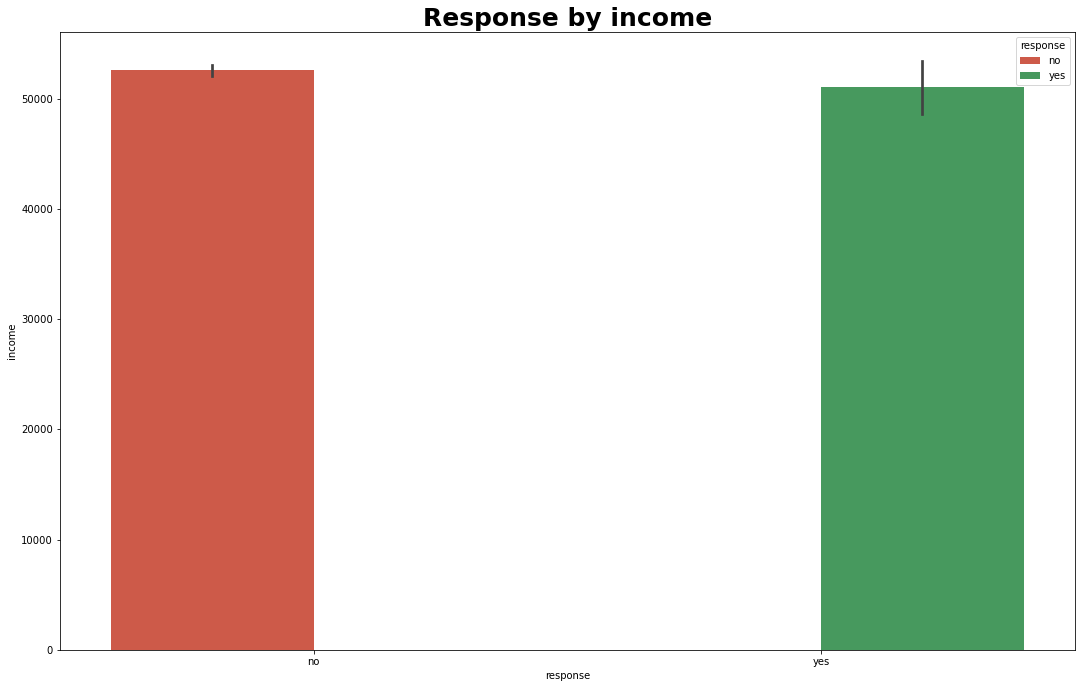

In [180]:
plt.figure(figsize=(40,25))
plt.subplot(2,2,1)
plt.title('Response by income', size='25', fontweight='bold')
sns.barplot(x = response_income['response'],y = response_income['income'], hue = response_income['response'], palette=palette_alive)

# Lab | Comparing regression models